In [2]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm import tqdm

frames = []
errors = []
for f in tqdm(glob('../results/*/*.csv')):
#     print(f)
    try:
        df = pd.read_csv(f)
        frames.append(df)
    except Exception as e:
        errors.append(f+'failed\n:'+str(e))
print('errors:',errors)
raw_data = pd.concat(frames)
print('columns:',raw_data.columns)


100%|██████████| 1767/1767 [03:51<00:00,  7.63it/s]


errors: []
columns: Index(['parameters', 'bal_accuracy', 'test_bal_accuracy', 'seed', 'dataset',
       'algorithm', 'parameters_hash'],
      dtype='object')


In [3]:
# raw_data.info()
print('parameters:',raw_data.parameters.nunique())
print('seeds:',raw_data.seed.nunique())
print('datasets:',raw_data.dataset.nunique())
print('algorithms:',raw_data.algorithm.unique())

parameters: 153473
seeds: 22
datasets: 166
algorithms: ['AdaBoostClassifier' 'BernoulliNB' 'DecisionTreeClassifier'
 'KNeighborsClassifier' 'LogisticRegression' 'PassiveAggressiveClassifier'
 'SGDClassifier' 'SVC' 'ExtraTreesClassifier' 'GradientBoostingClassifier'
 'RandomForestClassifier' nan]


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# check how many results we have for each seed/dataset
for seed, dfg in raw_data.groupby('seed'):
    print('seed:',seed,'datasets:',dfg['dataset'].nunique(),'algorithms:',dfg['algorithm'].nunique(),
          'parameters:',dfg['parameters_hash'].nunique(),'results:',len(dfg))

seed: -2114646268742243793 datasets: 0 algorithms: 0 parameters: 0 results: 1
seed: 1393 datasets: 166 algorithms: 11 parameters: 1287209 results: 1312963
seed: 2215 datasets: 166 algorithms: 10 parameters: 1184074 results: 1208300
seed: 3470 datasets: 157 algorithms: 10 parameters: 1091716 results: 1113300
seed: 3741 datasets: 157 algorithms: 10 parameters: 1094312 results: 1114070
seed: 8852 datasets: 157 algorithms: 10 parameters: 1097290 results: 1114070
seed: 13518 datasets: 166 algorithms: 10 parameters: 1186590 results: 1208300
seed: 16723 datasets: 158 algorithms: 10 parameters: 1103432 results: 1120428
seed: 19823 datasets: 166 algorithms: 10 parameters: 1177788 results: 1202920
seed: 19968 datasets: 158 algorithms: 10 parameters: 1091899 results: 1115357
seed: 20149 datasets: 166 algorithms: 10 parameters: 1187926 results: 1208300
seed: 20524 datasets: 158 algorithms: 10 parameters: 1097231 results: 1116127
seed: 22432 datasets: 158 algorithms: 10 parameters: 1090595 results:

In [5]:
# let's just look at one seed's data
# dfas = raw_data.loc[(raw_data.seed==1393) | (raw_data.algorithm=='hyperopt_estimator')]
dfas = raw_data.loc[(raw_data.seed==1393)]


In [6]:
# make algorithm-parameters feature
dfas.loc[:, 'algorithm-parameters'] = (                                             
                                       dfas['algorithm'].values + '|' +                     
#                                        dfas['parameters'].apply(lambda x: 
#                                                                 eval(x)).apply(lambda x: 
#                                                                                str(hash(frozenset(x.items()))))
                                       dfas['parameters']
                                      )

/home/bill/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/bill/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# look at results by dataset


getting ncombos...
total ncombos: 8132
{'GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_EDM-1_1': 8132, 'GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1': 8132, 'GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1': 8132, 'GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1': 8132, 'GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_50_EDM-2_001': 8132, 'GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_75_EDM-2_001': 8132, 'Hill_Valley_with_noise': 8096, 'Hill_Valley_without_noise': 8096, 'adult': 5917, 'agaricus-lepiota': 8132, 'allbp': 8132, 'allhyper': 8132, 'allhypo': 8132, 'allrep': 8132, 'analcatdata_aids': 8132, 'analcatdata_asbestos': 8132, 'analcatdata_authorship': 8132, 'analcatdata_bankruptcy': 8132, 'analcatdata_boxing1': 8132, 'analcatdata_boxing2': 8132, 'analcatdata_creditscore': 8132, 'analcatdata_cyyoung8092': 8132, 'analcatdata_cyyoung9302': 8132, 'analcatdata_dmft': 7457, 'analcatdata_fraud': 8132, 'analcatdata_germangss': 8132, 'analcatdata_happiness': 8132, 'analcatdata_japansolvent': 8132, 'ana

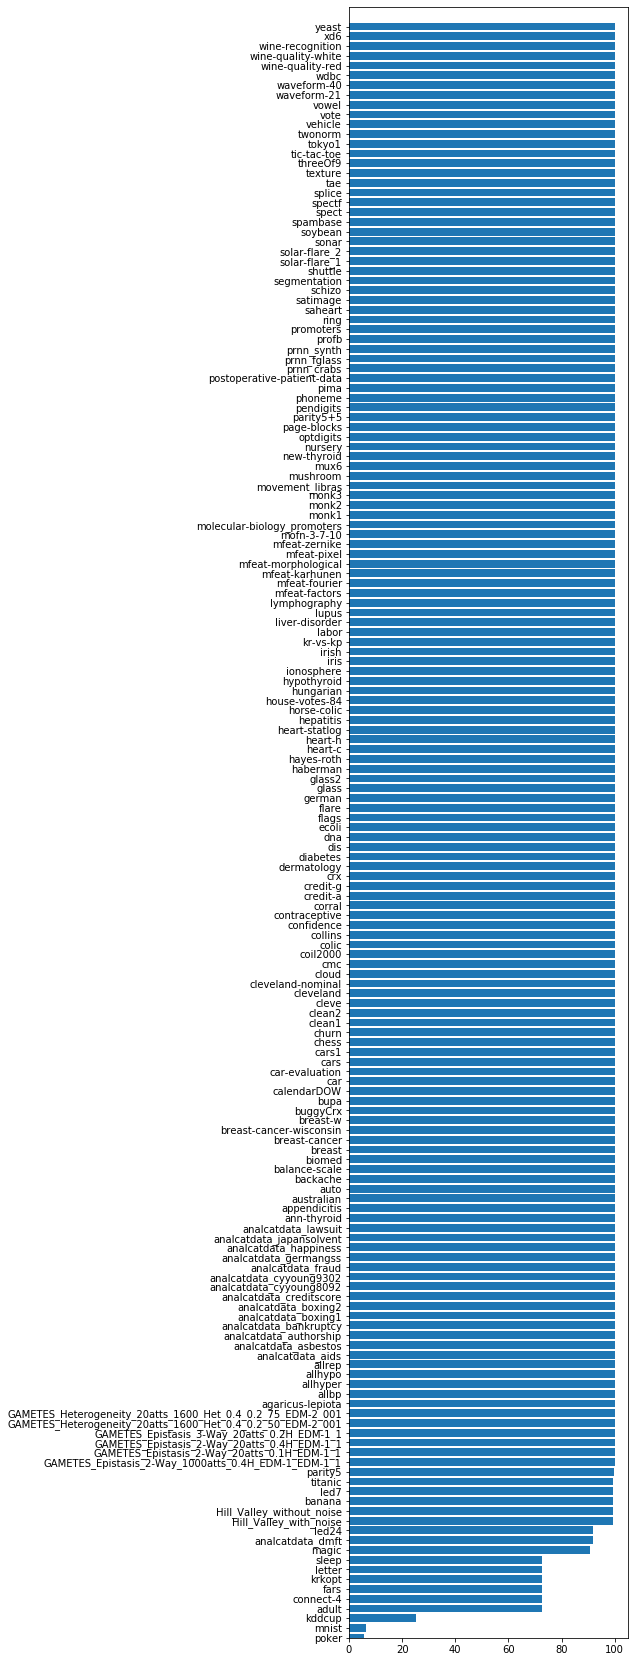

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
print('getting ncombos...')
ncombos = {}
total_ncombos = dfas['algorithm-parameters'].nunique()
for d, dfg in dfas.groupby('dataset'):
    ncombos[d] = dfg['algorithm-parameters'].nunique()
print('total ncombos:',total_ncombos)
print(ncombos)
print('number of complete datasets:',len([k for k,v in ncombos.items() if v==total_ncombos]))
print('lowest combo datasets:')
ncombos_sorted = sorted(ncombos.items(), key=lambda kv: kv[1])
print('ncombos sorted:',[(n[0],n[1]/total_ncombos*100) for n in ncombos_sorted])
plt.figure(figsize=(5,30))
plt.barh(np.arange(len(ncombos_sorted)),[nc[1]/total_ncombos*100 for nc in ncombos_sorted])
plt.gca().set_yticks(np.arange(len(ncombos_sorted)))
plt.gca().set_yticklabels([nc[0] for nc in ncombos_sorted])
plt.ylim(0,len(ncombos_sorted)+1)
plt.show()

In [9]:

for seed, df_g in dfas.groupby('seed'):
    print('seed:',seed)
    for ml, df_gs in df_g.groupby('algorithm'):
        print('example parameters for ',ml,'(',len(df_gs['parameters'].apply(str).unique()),'):\n',
               df_gs['parameters'].apply(str).unique()[0])
    print(10*'=')

seed: 1393
example parameters for  AdaBoostClassifier ( 35 ):
 {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 1393}
example parameters for  BernoulliNB ( 140 ):
 {'alpha': 0.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': 'true'}
example parameters for  DecisionTreeClassifier ( 154 ):
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 0.75, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 1393, 'splitter': 'best'}
example parameters for  ExtraTreesClassifier ( 770 ):
 {'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 0.1, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.25, 'n_estimators': 1

# filter datasets that don't have many parameter combinations

In [10]:
# remove datasets that have less than 85% of the parameter combinatiosn
big_data = [n[0] for n in ncombos_sorted if n[1]/total_ncombos < 0.995]
print('big data:',big_data)
print('filtering...')
dfas = dfas.loc[~dfas.dataset.isin(big_data)]
print('done. now there are',dfas.dataset.nunique(),'datasets with',
      dfas['algorithm-parameters'].nunique(),'unique algorithm-parameter combinations')

big data: ['poker', 'mnist', 'kddcup', 'adult', 'connect-4', 'fars', 'krkopt', 'letter', 'sleep', 'magic', 'analcatdata_dmft', 'led24']
filtering...
done. now there are 154 datasets with 8132 unique algorithm-parameter combinations


In [11]:
dfas.algorithm.unique()

array(['AdaBoostClassifier', 'BernoulliNB', 'DecisionTreeClassifier',
       'ExtraTreesClassifier', 'GradientBoostingClassifier',
       'KNeighborsClassifier', 'LogisticRegression',
       'PassiveAggressiveClassifier', 'RandomForestClassifier',
       'SGDClassifier', 'SVC'], dtype=object)

# remove alg-params that don't cover all datasets

In [13]:
all_datasets = dfas['dataset'].unique()
nd = len(all_datasets)
algp_toremove = []
from tqdm import tqdm
for algp, group in tqdm(dfas.groupby('algorithm-parameters')):
    if (group['dataset'].nunique()<nd):
        print(algp, '\n\t is missing results for', 
              [d for d in all_datasets if d not in group['dataset'].unique()])
        print('removing',algp)
        algp_toremove.append(algp)
print('constructing mask...')   
mask = np.array([ap not in algp_toremove for ap in dfas['algorithm-parameters'].values])
print('removing',np.sum(~mask),'results')
dfas = dfas.loc[mask,:]
print('new size:',len(dfas))

print(len(dfas['algorithm-parameters'].unique()),'unique algorithm-parameters')
# dfas.drop('algorithm-parameters',axis=1,inplace=True)

# check data 
import pandas as pd
ndatasets = dfas['dataset'].nunique()
for ml, dfg in dfas.groupby('algorithm'):
    dfg['parameters'] = dfg['parameters'].apply(lambda x: eval(x)).apply(lambda x: str(frozenset(x.items())))
    for ml_p, dfgp in dfg.groupby('parameters'):
        if (dfgp.dataset.nunique()!=ndatasets):
            print(ml_p,'only has',dfgp.dataset.nunique(),'dataset results')
            assert(dfgp.dataset.nunique()==ndatasets)

 21%|██        | 1671/8132 [00:00<01:32, 70.02it/s]

KNeighborsClassifier|{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 20, 'p': 2, 'weights': 'distance'} 
	 is missing results for ['parity5']
removing KNeighborsClassifier|{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 20, 'p': 2, 'weights': 'distance'}
KNeighborsClassifier|{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 20, 'p': 2, 'weights': 'uniform'} 
	 is missing results for ['parity5']
removing KNeighborsClassifier|{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}
KNeighborsClassifier|{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 21, 'p': 2, 'weights': 'distance'} 
	 is missing results for ['parity5']
removing K

 23%|██▎       | 1891/8132 [00:01<01:06, 93.15it/s]

PassiveAggressiveClassifier|{'C': 0.001, 'average': False, 'class_weight': None, 'early_stopping': False, 'fit_intercept': False, 'loss': 'squared_hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'random_state': 1393, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False} 
	 is missing results for ['banana', 'Hill_Valley_without_noise', 'Hill_Valley_with_noise', 'led7', 'titanic']
removing PassiveAggressiveClassifier|{'C': 0.001, 'average': False, 'class_weight': None, 'early_stopping': False, 'fit_intercept': False, 'loss': 'squared_hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'random_state': 1393, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
PassiveAggressiveClassifier|{'C': 0.001, 'average': False, 'class_weight': None, 'early_stopping': False, 'fit_intercept': True, 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'random_state': 1393,

PassiveAggressiveClassifier|{'C': 1.0, 'average': False, 'class_weight': None, 'early_stopping': False, 'fit_intercept': True, 'loss': 'squared_hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'random_state': 1393, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False} 
	 is missing results for ['banana', 'Hill_Valley_without_noise', 'Hill_Valley_with_noise', 'led7', 'titanic']
removing PassiveAggressiveClassifier|{'C': 1.0, 'average': False, 'class_weight': None, 'early_stopping': False, 'fit_intercept': True, 'loss': 'squared_hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'random_state': 1393, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
PassiveAggressiveClassifier|{'C': 10.0, 'average': False, 'class_weight': None, 'early_stopping': False, 'fit_intercept': False, 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'random_state': 1393, 'shuf

 25%|██▌       | 2057/8132 [00:02<00:54, 112.46it/s]

PassiveAggressiveClassifier|{'C': 50.0, 'average': False, 'class_weight': None, 'early_stopping': False, 'fit_intercept': False, 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'random_state': 1393, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False} 
	 is missing results for ['banana', 'Hill_Valley_without_noise', 'Hill_Valley_with_noise', 'led7', 'titanic']
removing PassiveAggressiveClassifier|{'C': 50.0, 'average': False, 'class_weight': None, 'early_stopping': False, 'fit_intercept': False, 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'random_state': 1393, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
PassiveAggressiveClassifier|{'C': 50.0, 'average': False, 'class_weight': None, 'early_stopping': False, 'fit_intercept': False, 'loss': 'squared_hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'random_state': 1393, 'shuffle'

100%|██████████| 8132/8132 [00:04<00:00, 1727.34it/s]


constructing mask...
removing 7200 results
new size: 1244936
8084 unique algorithm-parameters


/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## note: we've done away with rankings! they are too confusing.

In [14]:
for ml, df_g in dfas.groupby('algorithm'):
    print('example parameters for ',ml,'(',len(df_g['parameters'].apply(str).unique()),'):\n',
           df_g['parameters'].apply(str).unique()[0])

example parameters for  AdaBoostClassifier ( 35 ):
 {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 1393}
example parameters for  BernoulliNB ( 140 ):
 {'alpha': 0.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': 'true'}
example parameters for  DecisionTreeClassifier ( 154 ):
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 0.75, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 1393, 'splitter': 'best'}
example parameters for  ExtraTreesClassifier ( 770 ):
 {'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 0.1, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.25, 'n_estimators': 100, 'n_jobs

In [15]:
print(len(dfas.dataset.unique()),'unique datasets')
print(dfas.algorithm.unique())

154 unique datasets
['AdaBoostClassifier' 'BernoulliNB' 'DecisionTreeClassifier'
 'ExtraTreesClassifier' 'GradientBoostingClassifier'
 'KNeighborsClassifier' 'LogisticRegression' 'RandomForestClassifier'
 'SGDClassifier' 'SVC']


# how many winners of each algorithm are there? (winning = < 1% away from best score)

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_winners(df_in):
    winner = {}
    winner_datasets = {}
    import numpy as np
    for d, df in df_in.groupby('dataset'):
        df['test_bal_accuracy'] = df['bal_accuracy'].apply(pd.to_numeric)
        best_score = df['test_bal_accuracy'].max()
        for clf, dfg in df.groupby('algorithm'):
            wins = np.any((best_score - dfg.test_bal_accuracy)/best_score <= 0.01)
            if wins:
                if clf in winner:
                    winner[clf] += 1
                    winner_datasets[clf].append(d)
                else:
                    winner[clf] = 1
                    winner_datasets[clf] = [d]
    # print(winner)
    # print(winner_datasets)
    keys = list(sorted(winner.keys()))[::-1]
    vals = [winner[k] for k in keys]
    h = plt.figure(figsize=(9,5))
    plt.barh(keys, vals)
    plt.gca().set_aspect(4)
    # plt.xticks(rotation=90)   
    plt.xticks(fontsize=12)
#     plt.title('Underlying Distribution of Algorithm Performance')
    plt.ylabel('Algorithm',fontsize=12)
    plt.xlabel('# Datasets with Nearly Optimal Results', fontsize=12)
    return h

/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


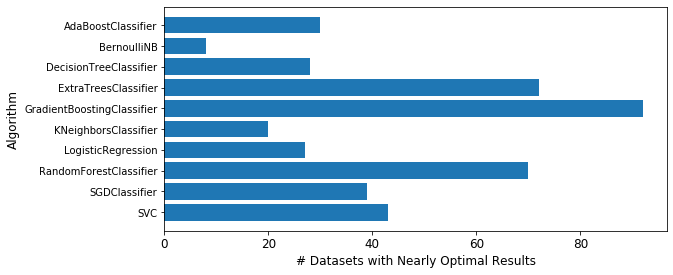

In [51]:
h = plot_winners(df)
h.savefig('../../paper/figs/pmlb2_algo_winners_bar.pdf',bbox_inches='tight')

# write modified data to file

In [14]:
#choose which columns to save
# df_write = dfas[['dataset','algorithm','seed','parameters','bal_accuracy','test_bal_accuracy']]
# df_write.to_csv('pmlb_sklearn-benchmark2-data-mock_experiment.tsv.gz',compression='gzip',index=False,sep='\t')
# print(df_write.columns)